In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import os
import pandas as pd
import numpy as np

In [14]:
def plot_apsidal_precessions():
    data_file_path = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'apsidal_precessions', 'apsidal_precessions.csv')
    data = pd.read_csv(data_file_path)

    random_Omega_mask = np.array([('_randomO' in system_name) for system_name in data['System Name']])
    aligned_Omega_mask = ~random_Omega_mask

    random_Omega_data = np.log10(data[random_Omega_mask]['Apsidal Precession Period (Years)'])
    aligned_Omega_data = np.log10(data[aligned_Omega_mask]['Apsidal Precession Period (Years)'])

    bin_range = (min(random_Omega_data.min(), aligned_Omega_data.min()), max(random_Omega_data.max(), aligned_Omega_data.max()))

    (y_random_Omega, x_random_Omega) = np.histogram(random_Omega_data, bins = 100, range = bin_range, density = True)
    (y_aligned_Omega, x_aligned_Omega) = np.histogram(aligned_Omega_data, bins = 100, range = bin_range, density = True)

    x_random_Omega = np.delete(x_random_Omega, -1)
    x_aligned_Omega = np.delete(x_aligned_Omega, -1)
    bin_size = abs(x_random_Omega[1] - x_random_Omega[0])

    (fig, axis) = plt.subplots(1, 1)

    axis.bar(x_aligned_Omega, y_aligned_Omega, bin_size, color = 'red', alpha = 0.5)
    axis.bar(x_random_Omega, y_random_Omega, bin_size, color = 'blue', alpha = 0.5)

    axis.set_xlabel('Apsidal Precession Period $\log_{10}($Years$)$')
    axis.set_ylabel('Density (Integral of distribution = 1)\nbin size $=$%.3f $\log_{10}($Years$)$' % round(bin_size, 3))

    axis.set_axisbelow(True)
    axis.grid(True, axis = 'y', alpha = 0.2)

    fig.suptitle('Distribution of Apsidal Precession Periods ($\dot{\omega}$)\n(Tidal Bulges, Rotational Bulges, and General Relativity)')

    fig.legend(['Aligned $\Omega$', 'Random $\Omega$'], loc = (0.14, 0.77))

    save_path = os.path.join(os.pardir, os.pardir, 'results', 'apsidal_precessions', 'apsidal_precessions_distribution')
    fig.savefig(save_path, dpi = 300, bbox_inches = 'tight')

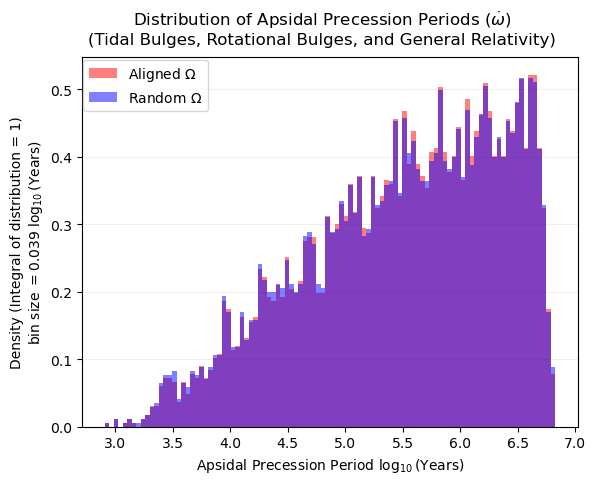

In [15]:
plot_apsidal_precessions()